In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import urllib
import io
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
urls = ['https://i.ibb.co/4jQ5vvf/garfield-cropped-transparent.png',
       'https://i.ibb.co/BfJNCkW/garfield3-removebg-preview.png',
       'https://i.ibb.co/GMhtZgx/garfield5-removebg-preview.png',
       'https://i.ibb.co/XXkJdjB/garfield6-removebg-preview.png',
       'https://i.ibb.co/HNgsyNc/garfield7.png']

In [3]:
def read(url):
    garfield_file = urllib.request.urlopen(url)
    garfield_file = io.BytesIO(garfield_file.read())
    garfield = Image.open(garfield_file)
    garfield = garfield.resize((28,28))
    garfield = garfield.convert('L')
    garfield = np.array(garfield)
    return garfield

In [4]:
garfields = [read(url) for url in urls]
garfields = np.array(garfields).reshape((28,28,5))
for augmentation in [np.rot90(garfields), np.rot90(garfields, 2), np.rot90(garfields, 3), np.flipud(garfields), np.fliplr(garfields)]:
    garfields = np.append(garfields, augmentation, axis=2)
garfields = garfields.reshape((30,28,28))
garfields = garfields.reshape((30,784))
garfields = garfields.T

In [5]:
mnist = fetch_openml('mnist_784')

In [6]:
mnist_array = np.array(mnist.data)

In [7]:
mnist_array = mnist_array.reshape((70000, 28 * 28))

In [8]:
mnist_labels = np.array(mnist.target, dtype='int32')

In [9]:
x_train, x_test, y_train, y_test = train_test_split(mnist_array, mnist_labels)

In [10]:
x_train.shape

(52500, 784)

In [11]:
num_garfields = garfields.shape[1]

In [12]:
transformed_x_train = np.zeros((len(x_train), num_garfields))
transformed_x_test = np.zeros((len(x_test), num_garfields))

In [13]:
for i, image in enumerate(x_train):
    transformed_x_train[i,:] = np.linalg.lstsq(garfields, image)[0]

<ipython-input-13-c29550df7b8d>:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  transformed_x_train[i,:] = np.linalg.lstsq(garfields, image)[0]


In [14]:
for i, image in enumerate(x_test):
    transformed_x_test[i,:] = np.linalg.lstsq(garfields, image)[0] 

<ipython-input-14-f3bd952a7578>:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  transformed_x_test[i,:] = np.linalg.lstsq(garfields, image)[0]


In [15]:
clf = SVC()

In [16]:
clf.fit(transformed_x_train, y_train)

SVC()

In [17]:
preds = clf.predict(transformed_x_test)

In [18]:
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1712
           1       0.97      0.99      0.98      1932
           2       0.95      0.95      0.95      1850
           3       0.94      0.94      0.94      1716
           4       0.95      0.95      0.95      1735
           5       0.94      0.93      0.93      1601
           6       0.97      0.98      0.98      1657
           7       0.96      0.95      0.96      1855
           8       0.94      0.92      0.93      1734
           9       0.92      0.93      0.92      1708

    accuracy                           0.95     17500
   macro avg       0.95      0.95      0.95     17500
weighted avg       0.95      0.95      0.95     17500

[[1688    1    6    2    1    0    6    4    3    1]
 [   0 1907    8    2    3    4    0    1    4    3]
 [   6    6 1750   15   11    6   12   20   22    2]
 [   1    5   25 1606    5   26    2   12   19   15]
 [   3    5    9    1 1645   

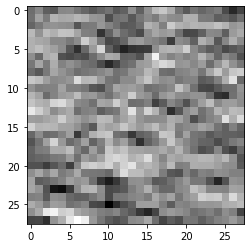

In [45]:
plt.imshow((garfields@transformed_x_test[1]).reshape(28,28), cmap='gray')

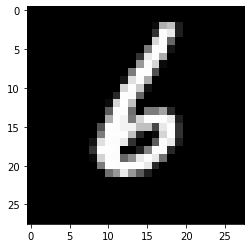

In [47]:
plt.imshow(x_test[1].reshape(28,28), cmap='gray')